<a href="https://colab.research.google.com/github/tyuminarita/code-example/blob/main/pr4%20FALSE%20presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Точность сети: 95.09%


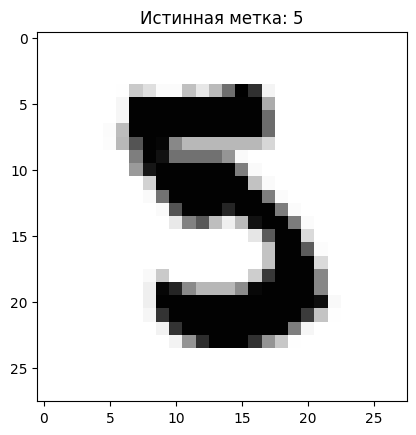

Предсказание сети: 3
Правильная метка: 5


In [64]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
import random  # <--- Для случайного выбора

# Класс нейросети
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                    (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5),
                                    (self.onodes, self.hnodes))

        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)),
                                     hidden_outputs.T)
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)),
                                     inputs.T)

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

# ===============================
# Параметры сети и инициализация
# ===============================
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# ========================
# Загрузка обучающих данных
# ========================
train_data = pd.read_csv('/content/mnist_train.csv', on_bad_lines='skip')

for i in range(len(train_data)):
    row = train_data.iloc[i].to_numpy()
    label = int(row[0])
    inputs = (row[1:] / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[label] = 0.99
    nn.train(inputs, targets)

# ========================
# Тестирование на тесте
# ========================
test_data = pd.read_csv('/content/mnist_test.csv', on_bad_lines='skip')
scorecard = []

for i in range(len(test_data)):
    row = test_data.iloc[i].to_numpy()
    correct_label = int(row[0])
    inputs = (row[1:] / 255.0 * 0.99) + 0.01
    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    scorecard.append(1 if label == correct_label else 0)

accuracy = np.mean(scorecard)
print(f'Точность сети: {accuracy * 100:.2f}%')

# ========================
# === Вывод случайного изображения ===
# ========================
index = random.randint(0, len(test_data) - 1)
sample = test_data.iloc[index].to_numpy()
true_label = int(sample[0])
image_data = sample[1:]

# Показ изображения
plt.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')
plt.title(f"Истинная метка: {true_label}")
plt.show()

# Подготовка и предсказание
inputs = (image_data / 255.0 * 0.99) + 0.01
outputs = nn.query(inputs)
predicted_label = np.argmax(outputs)

print(f"Предсказание сети: {predicted_label}")
print(f"Правильная метка: {true_label}")
